# Tarea 2: Red Neuronal Perceptrón Multicapa con Keras

## Cargamos las librerias

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from google.colab import files
print(plt.style.available)
%matplotlib inline


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
plt.style.use('seaborn-paper')

In [ ]:
!nvidia-smi

Tue Sep 27 18:35:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    32W /  70W |   1486MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
fashion_mnist = load_data()


## Extraemos los datos

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist


## Union de Datos

El dataset Fashion_Mnist cuenta con 60,000 imagenes de entrenamiento y 10,000 imagenes de prueba; Para los fines de esta tarea, se hara una división del dataset con una relación 30-70, es decir, %30 del dataset será destinado a test y %70 a entrenamiento.

In [ ]:
X = np.concatenate((x_train, x_test))
Y = np.concatenate((y_train, y_test))


In [ ]:
X = X.reshape(len(X), 28*28).astype('float32')
X=X/255.0


## Codificación One Hot Encoding 

Las clases se representan con etiquetas numericas en el rango de $0,\cdots,9$:

<div align="center">

| Identificador 	| Clase 	|
|---	|---	|
| 0 	| T-shirt/top 	|
| 1 	| Trouser 	|
| 2 	| Pullover 	|
| 3 	| Dress 	|
| 4 	| Coat 	|
| 5 	| Sandal 	|
| 6 	| Shirt 	|
| 7 	| Sneaker 	|
| 8 	| Bag 	|
| 9 	| Ankle Boot 	|

</div>

Debido al identificador puede (o no) realizarse una codificación del tipo One Hot. Esta codificación permite que el modelo neuronal interprete la distancia entre identificadores de la misma forma, es decir, en un mal aprendizaje puede asociar la clase "Trouser" con la clase "Pullover" por que los identificadores son cercanos entre si, de forma comtraria es posible que interprete una relación (erronea) entre los identificadores mas separadas, lo cual no es relevante.

A fin de observar el efecto de la codificación se realizaran dos modelos: uno con codificación ONE HOT y otro sin ella.


In [ ]:
ONE_HOT_ENC = OneHotEncoder(sparse=False)
Y_OHE = Y.reshape(len(Y), 1)
Y_OHE = ONE_HOT_ENC.fit_transform(Y_OHE)


In [ ]:
print("Las dimensiones del vector de etiquetas son {}".format(Y.shape))
print("Los primeros 10 elementos son: \n {}".format(Y[0:10]))


Las dimensiones del vector de etiquetas son (70000,)
Los primeros 10 elementos son: 
 [9 0 0 3 0 2 7 2 5 5]


In [ ]:
print("Los primeros 10 elementos codificados son: \n {}".format(Y_OHE[0:10]))


Los primeros 10 elementos codificados son: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_OHE, train_size=0.9, random_state=222)
x_train,x_val,y_train,y_val=train_test_split(x_train, y_train, train_size=0.7, random_state=333)

print("Tamaño del set de entrenamiento: {} elementos".format(len(x_train)))
print("Tamaño del set de validación: {} elementos".format(len(x_val)))
print("Tamaño del set de prueba: {} elementos".format(len(x_test)))

Tamaño del set de entrenamiento: 44100 elementos
Tamaño del set de validación: 18900 elementos
Tamaño del set de prueba: 7000 elementos


## Arquitectura de el modelo



In [ ]:
MLP_1 = tf.keras.Sequential()

MLP_1.add(Dense(784, activation='relu', input_shape=(28*28,)))
#MLP_1.add(Dropout(0.15))
MLP_1.add(Dense(650, activation='relu'))
MLP_1.add(Dense(500, activation='relu'))
MLP_1.add(Dense(10,activation='softmax'))

MLP_1.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 784)               615440    
                                                                 
 dense_31 (Dense)            (None, 650)               510250    
                                                                 
 dense_32 (Dense)            (None, 500)               325500    
                                                                 
 dense_33 (Dense)            (None, 10)                5010      
                                                                 
Total params: 1,456,200
Trainable params: 1,456,200
Non-trainable params: 0
_________________________________________________________________


### Optimizador

In [ ]:
optimizer=tf.keras.optimizers.SGD(lr=0.001,decay=1e-6, momentum=0.9, nesterov=False)
MLP_1.compile(optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
checkpoint_filepath = 'tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    initial_value_threshold=0.85)

## Entrenamiento

In [ ]:
HIST = MLP_1.fit(x_train, y_train,
                batch_size=360,
                epochs=70,
                verbose=1,
                validation_data=(x_val, y_val),
                callbacks=[model_checkpoint_callback])


Epoch 1/70
123/123 [==============================] - 1s 9ms/step - loss: 1.6855 - accuracy: 0.5410 - val_loss: 1.1502 - val_accuracy: 0.6629
Epoch 2/70
123/123 [==============================] - 1s 6ms/step - loss: 0.9451 - accuracy: 0.7027 - val_loss: 0.8319 - val_accuracy: 0.7203
Epoch 3/70
123/123 [==============================] - 1s 5ms/step - loss: 0.7582 - accuracy: 0.7500 - val_loss: 0.7214 - val_accuracy: 0.7604
Epoch 4/70
123/123 [==============================] - 1s 5ms/step - loss: 0.6739 - accuracy: 0.7784 - val_loss: 0.6565 - val_accuracy: 0.7866
Epoch 5/70
123/123 [==============================] - 1s 5ms/step - loss: 0.6191 - accuracy: 0.7968 - val_loss: 0.6133 - val_accuracy: 0.7968
Epoch 6/70
123/123 [==============================] - 1s 7ms/step - loss: 0.5797 - accuracy: 0.8092 - val_loss: 0.5819 - val_accuracy: 0.8056
Epoch 7/70
123/123 [==============================] - 1s 6ms/step - loss: 0.5507 - accuracy: 0.8171 - val_loss: 0.5582 - val_accuracy: 0.8119
Epoch 

### Curvas de aprendizaje

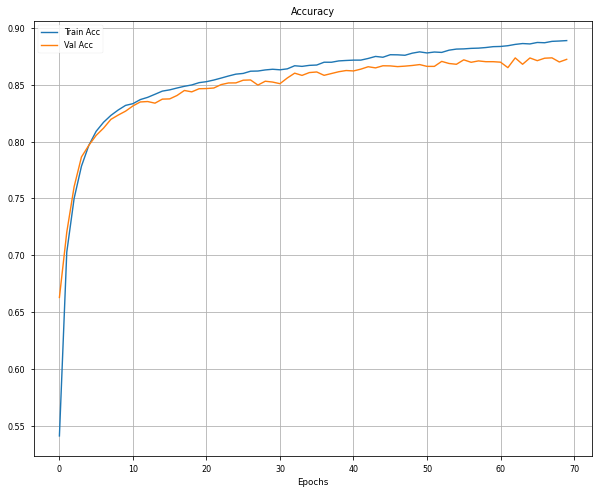

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(HIST.history['accuracy'])
plt.plot(HIST.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train Acc", "Val Acc"])
plt.xticks(np.arange(0,75,10))
plt.grid()
plt.savefig("Accuracy_Plot.png",dpi=300,bbox_inches='tight')
plt.show()

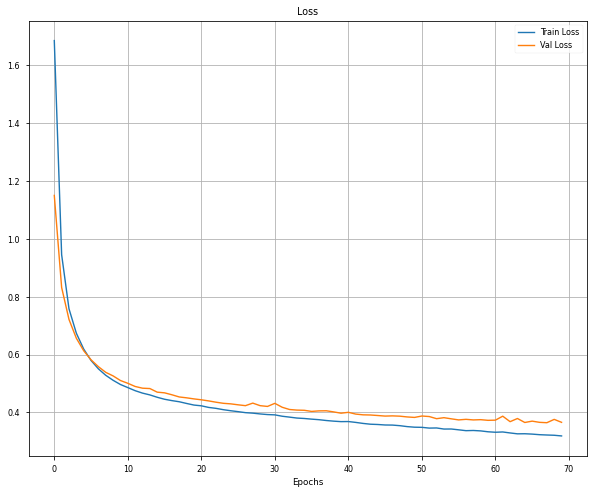

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(HIST.history['loss'])
plt.plot(HIST.history['val_loss'])
plt.title("Loss")
plt.xlabel("Epochs")
plt.legend(["Train Loss", "Val Loss"])

plt.xticks(np.arange(0,75,10))
plt.grid()
plt.savefig("Loss_Plot.png",dpi=300,bbox_inches='tight')
plt.show()

## Medidas de Desempeño

A partir del conjunto de datos de prueba medimos la exactitud del modelo obtenido.

In [ ]:
score = MLP_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

219/219 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8769
Test loss: 0.3365764915943146
Test accuracy: 0.8768571615219116


In [ ]:
y_pred = MLP_1.predict(x_test)

class_preds = np.argmax(y_pred, axis=-1)

OutPut=class_preds.reshape(len(y_pred), 1)
OutPut=ONE_HOT_ENC.fit_transform(OutPut)



In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

score=accuracy_score(y_test,OutPut)

print("Exactitud de:{}".format(score))

Exactitud de:0.8768571428571429


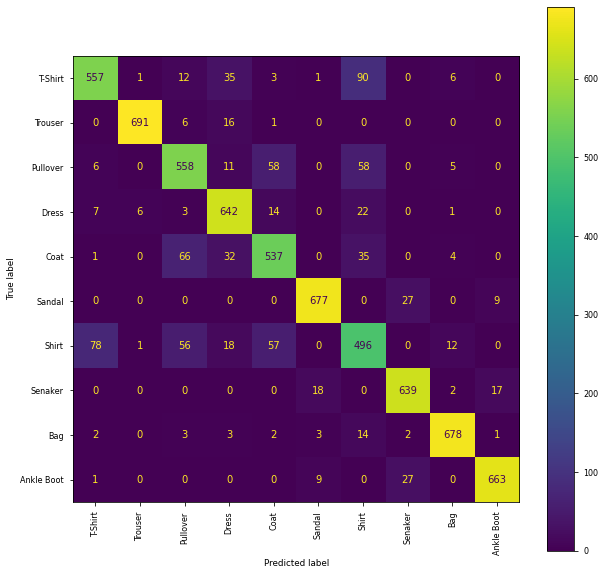

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
figure,ax=plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(np.argmax(y_test,axis=1), 
                                        np.argmax(OutPut,axis=1),
                                        display_labels=["T-Shirt","Trouser",
                                                "Pullover","Dress",
                                                "Coat","Sandal",
                                                "Shirt","Senaker",
                                                "Bag","Ankle Boot"],
                                        xticks_rotation='vertical',
                                        ax=ax)
plt.savefig("CFMatrix_Plot.png",dpi=300,bbox_inches='tight')
plt.show()